### All the techniques of handling 

1. Mean/ Median/Mode replacement
2. Frequent categories imputation
3. Replace NAN with a new category

+ Capturing NAN values with a new feature

In [12]:
import pandas as pd
import numpy as np 

In [4]:
! ls

## Missing Values- Feature Engineering.ipynb
Feature Encoding .ipynb
Outliers.ipynb
README.md
Untitled.ipynb
loan.csv
mercedes.csv
mobile_dataset.csv
monthly-milk-production-pounds.csv
test.csv
titanic.csv
train.csv


In [26]:
df = pd.read_csv('titanic.csv')

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.shape

(891, 12)

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [13]:
df['Cabin_null'] =  np.where(df['Cabin'].isnull(),1,0)

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [15]:
df['Cabin_null'].mean()

0.7710437710437711

In [16]:
df.groupby(['Survived'])['Cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

In [ ]:
# 1. Mean/ Median/Mode replacement

In [ ]:
1 - 2 -3-4-5

In [17]:
df.Age.median()

28.0

In [27]:
df['Age_median'] = df['Age'].fillna(df.Age.median())

In [28]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age_median       0
dtype: int64

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

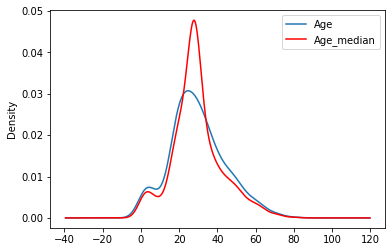

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [30]:
#2. Frequent categories imputation

SyntaxError: invalid syntax (<ipython-input-30-0569614d0c8b>, line 1)

In [31]:
! ls

## Missing Values- Feature Engineering.ipynb
Feature Encoding .ipynb
Outliers.ipynb
README.md
Untitled.ipynb
loan.csv
mercedes.csv
mobile_dataset.csv
monthly-milk-production-pounds.csv
test.csv
titanic.csv
train.csv


In [35]:
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [37]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [38]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [42]:
df.GarageType.value_counts().index[0]

'Attchd'

In [44]:
most_freq = df.GarageType.mode()[0]

In [47]:
df['GarageType'].fillna(most_freq,inplace = True)

In [48]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType       0
SalePrice        0
dtype: int64

In [50]:
df.GarageType.value_counts()

Attchd     951
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [ ]:
#### Replace NAN with a new category

In [51]:
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [53]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [54]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [55]:
df['GarageType'] = np.where(df['GarageType'].isnull(),'Missing',df['GarageType'])

In [68]:
df.isnull().sum()

BsmtQual           37
FireplaceQu       690
GarageType          0
SalePrice           0
GarageType_NAN      0
dtype: int64

In [58]:
df.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Missing     81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [60]:
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [71]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,GarageType_NAN
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [63]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [64]:
df['GarageType_NAN'] = np.where(df['GarageType'].isnull(),1,0) 

In [70]:
df['GarageType'] = np.where(df['GarageType'].isnull(),'Missing',df['GarageType'])